In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler
matplotlib.rc("font", family="serif", size=14)
matplotlib.rc("figure", figsize="10, 5")
colors = ['k', 'c', 'm', 'y']
matplotlib.rc('axes', prop_cycle=cycler("color", colors))

# RADIATIVE PROCESSES IN ASTROPHYSICS

GEORGE B. RYBICKI, ALAN P. LIGHTMAN Copyright 0 2004 W Y - V C H Verlag GmbH L Co. KCaA

Problems: 1.1, 1.4, 1.5, 1.7, 1.9

## 1.1 Pinhole Camera

Since I don't like to write equations, let's try the other ways.

In [17]:
import random

# Define Functions
## Brightness I depends on θ and ϕ, 
## but it is not given in this question.
## I will use uniform distribution with Brightness I (it doesn't matter).
def I(theta, phi):
    while True:
        yield random.random()

## Flux, given in eq (1.3b) in textbook, 
## is intergrating I cosθ over solid angle dΩ.
def F(I, theta, dOmega):
    return I * np.cos(theta) * dOmega

The only unknown variable is `dOmega` ($d\Omega$).  
However, by geometry, we can get:

In [45]:
# Since the solid angle is projected from the `pinhole`,
# the dOmega is propotional to the projected area of the pinhole.
def dOmega(pinhole_area, L, theta):
    return pinhole_area * np.cos(theta) / (L / np.cos(theta))**2

The final step is to fix variables, and try to see the relation between Flux F and Brightness I.

In [4]:
# we first define a function to sample Brightness from generator I.
import itertools

def take(n, iterable):
    "Return first n items of the iterable as a list."
    return list(itertools.islice(iterable, n))

In [56]:
import numpy as np

# define fixed variables
L = 10    # distance
d = 0.01 # diameter of pinhole
pinhole_area = np.pi * (d / 2)**2

# generating Flux
theta = np.linspace(-np.pi, np.pi, 1000)
phi   = np.pi # aribrary

# draw 100 samples
Brightness = np.array([take(100, I(t, phi)) for t in theta])

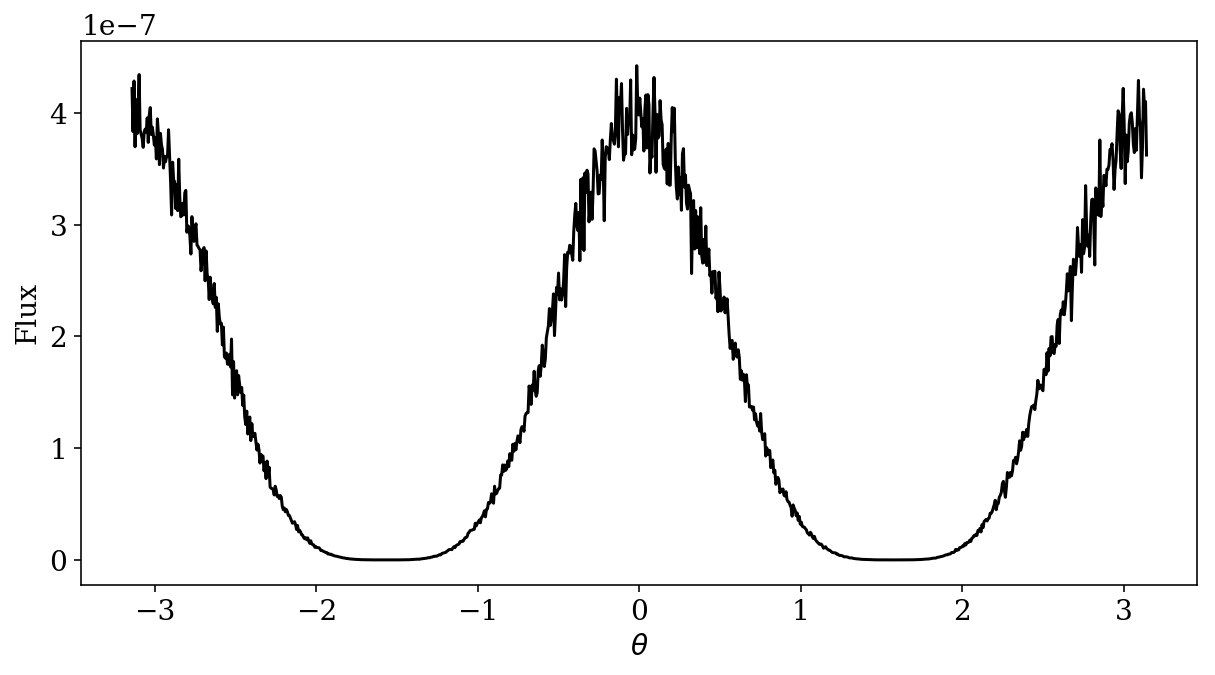

In [60]:
# get the Flux output with mean from every 100 samples
Flux  = F(Brightness.mean(axis=1), 
          theta, 
          dOmega(pinhole_area, L, theta))
plt.plot(theta, Flux, )
plt.ylabel('Flux')
plt.xlabel('$\\theta$');

We know the answer of this question is something like:
$$
F = \frac{\pi \cos^4\theta}{4f^2} I(\theta, \phi)
$$
we compare the result with I = 0.5.

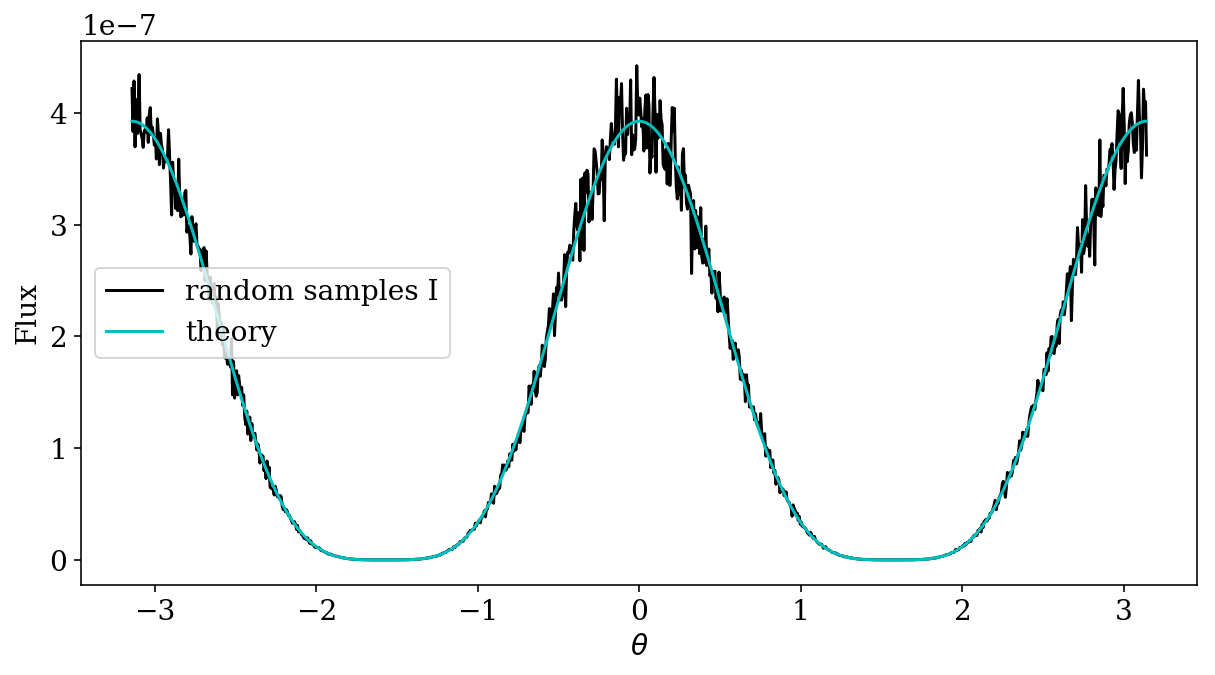

In [59]:
Flux_theory = np.pi * np.cos(theta)**4 / 4 / (L / d)**2 * 0.5
plt.plot(theta, Flux, label='random samples I')
plt.plot(theta, Flux_theory, label='theory')
plt.ylabel('Flux')
plt.xlabel('$\\theta$')
plt.legend();

My answer is a little ad-hoc, since I did not really do any simulations to generate Flux. Both `random samples I` and `theory` are analytical and written in exact geometry equations. But anyway, the result seems ok.

## 1.4 
*a.*  **Luminosity ratio**  
I cannot figure out how to write this answer in code...  

From (1.34), we have the equation for force per unit mass is proportional to integration of Flux over frequency. Since we can assume Flux doesn't depend on frequency, we have

$$\begin{equation}
  f = \frac{F}{m} = \frac{1}{c} \kappa F_{\nu}
\end{equation}$$

we  have the equation for gravity
$$\begin{equation}
    F = \frac{{GMm}}{{{r^2}}}
\end{equation}$$

The condition to move the object is
$$\begin{equation}
    \frac{1}{c}\kappa {F_\nu }m > \frac{{GMm}}{{{r^2}}}
\end{equation}$$

To relate to L, we assume spherical symmetry emission with $F_{\nu} = \frac{L}{4\pi r^2}$, 
$$\begin{equation}
    \frac{M}{L} < \frac{\kappa }{{4\pi Gc}}
\end{equation}$$

Luminosity ratio should be smaller than $\frac{\kappa }{{4\pi Gc}}$.

*b. *  **terminal velocity**  

The terminal velocity should be the ejection velocity, so the work we've done should equate to ejection energy, 

$$\begin{equation}
    W = \int {{F_{net}}}  = \int\limits_\infty ^R {\frac{{GMm}}{{{r^2}}} - \frac{{L\kappa }}{{4\pi {r^2}c}}mdr = \frac{1}{2}m{v^2}} 
\end{equation}$$

$$
 - \frac{{GM}}{R} + \frac{{L\kappa }}{{4\pi Rc}} = \frac{1}{2}{v^2}
$$

$$\begin{equation}
  {v^2} = 2\frac{{GM}}{R}\left( {\frac{{\kappa L}}{{4\pi GMc}} - 1} \right)  
\end{equation}$$


*c.*  **Maximum Luminosity not eject hydrogen by radiation**   

In [74]:
# from above equation (4)
thomson = 6.65 * 10**-25
m_h = 1.673534 * 10**-24
G   = 6.674 * 10**-8
c   = 3 * 10**10
kappa = thomson / m_h
M_sun = 2 * 10**33

# L / M = 4 π G c / κ
L = 4 * np.pi * G * c / kappa * M_sun

print ('luminosity is {}'.format(L))

luminosity is 1.2663688272516492e+38


luminosity is 1.267e+38 $erg$ $s^{-1}$ $(M/M_{\odot})$

# 1.5 supernova remnant

a. 

In [81]:
# assume the emission is thermal
ang_diameter = 4.3 # arcmin
flux_100 = 1.6 * 10**-19 # erg cm^-2 s^-1 Hz^-1

def Brightness(F_v, delta_Omega):
    return F_v / delta_Omega

delta_Omega = np.pi * \
    (ang_diameter / 2 * np.pi / 180 / 60)**2. # deg -> radian
    
# get Brightness    
I_100 = Brightness(flux_100, delta_Omega)
print('I_100 = {0:.3g} erg cm^-2 s^-1 Hz^-1 ster^-1'.format(I_100))

# get Brightness Temperature
c = 3 * 10**10 # cm / s
k = 1.38 * 10**-16 # erg / K

def Brightness_Temp(v, I_v):
    return c**2 / (2 * v**2 * k) * I_v

T_100 = Brightness_Temp(100 * 10**6, I_100)
print('T_100 = {0:.3g} K'.format(T_100))

I_100 = 1.3e-13 erg cm^-2 s^-1 Hz^-1 ster^-1
T_100 = 4.25e+07 K


In [83]:
# h v << k T: gov by Rayleigh-Jeans Law
# h v >> k T: gov by Wien's Law
hv_large_than_kT = ['Rayleigh-Jeans Law', 
                    'Wien"s Law']

# constant
h = 6.626 * 10**-34 * 10**7 # erg s

print('Blackbody curve is govern by {}'.format(
    hv_large_than_kT[(h * 100 * 10**6) >
                     (k * T_100)]))

Blackbody curve is govern by Rayleigh-Jeans Law


b. 

Let's do some language transformations:  
1. `compact` $\rightarrow$ `ang_diameter smaller`  
2. `What effect does this have on the value of
Tb?` $\rightarrow$ `What is Tb?`

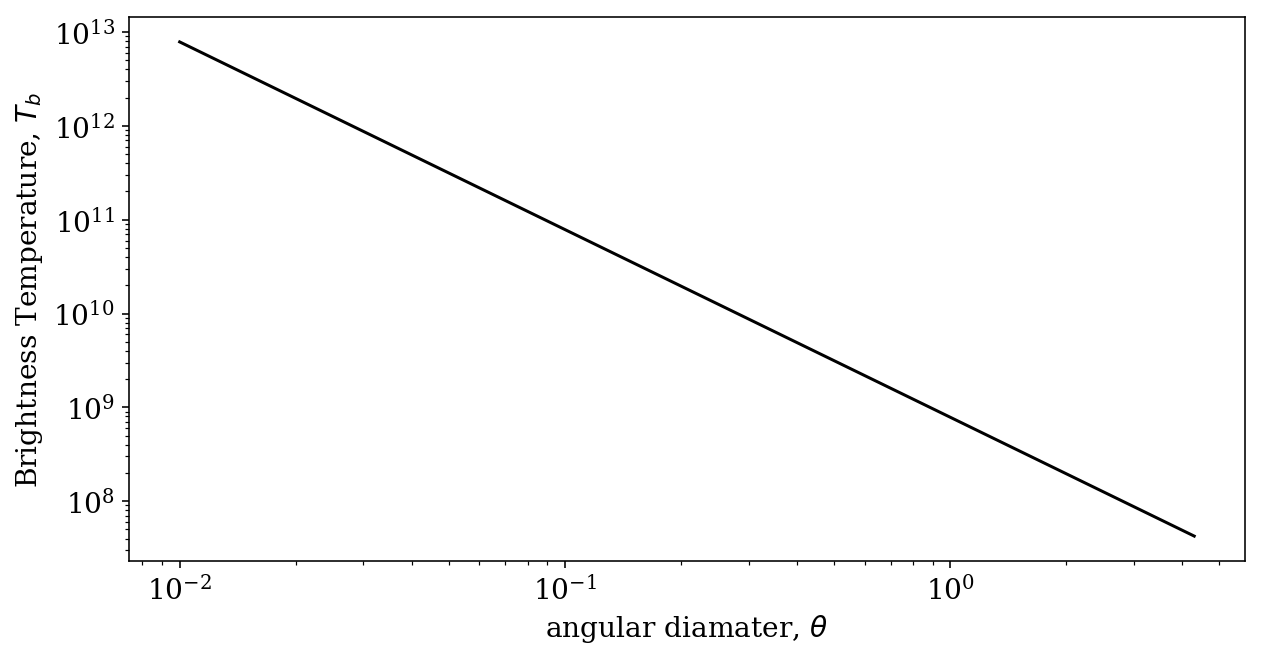

In [97]:
# make angular diameter smaller ~
ang_diameters = np.linspace(4.3, 0.01, 1000)

# generate
T_bs = Brightness_Temp(100 * 10**6, 
    Brightness(flux_100, 
    np.pi * (ang_diameters / 2 * np.pi / 180 / 60)**2.)
    )

# plot the curve for decreasing angular diameters
plt.loglog(ang_diameters, T_bs)
plt.xlabel('angular diamater, $\\theta$')
plt.ylabel('Brightness Temperature, $T_{b}$')

$T_b$ is larger for smaller angular diameter.  
It seems that $T_b \propto \theta^{-2}$.

c. At what frequency will the Brightness be maximum?

Get eq (1.56b): 
$$\begin{equation}
\frac{\nu_{max}}{T} = 5.88 \times 10^{10} \text{Hz } \text{deg}^{-1}
\end{equation}$$

In [99]:
v_max = 5.88 * 10**10 * T_100
print('v_max = {0:.3g} Hz'.format(v_max))

v_max = 2.5e+18 Hz


d.   
I need some language transformations...  
`What can you say about the temperature of the material from the above results?` $\rightarrow$ **What are you talking about anyway??** What can I *say* ...? I *say* it looks good!

Okay, with a peek of solution page, I got the idea:  
`What can you say about the temperature of the material from the above results?` $\rightarrow$ `Try to describe T of material in eq. (1.62)`

eq. (1.62)  
$$\begin{equation}
T_{b} = T_{b}(0) e^{-\tau_{\nu}} + T(1 - e^{-\tau_{\nu}}),
\end{equation}$$
where $T$ is Temp of material, $\tau_{\nu}$ is optical depth. That is to say, if $e^{-\tau_{\nu}} \rightarrow 0$, then $T_{b} \sim T$.

With this, we can say  
$$\begin{equation}
T \geqslant T(1 - e^{-\tau_{\nu}}) > T_{b} - T_{b}(0) e^{-\tau_{\nu}} \sim T_{b}
\end{equation}$$

Suppose $T_b (0)$ is small compare to $T_{b}$

# 1.7 

a.
Rewrite eq. (1.71) with $B_{21} = 0$.  
$$\begin{equation}
\bar J = \frac{A_{21}}{g_1 B_{12}/ g_2 \exp{(h\nu_0 / k T)} - B_{21}} = \frac{{{g_2}{A_{21}}}}{{{g_1}{B_{12}}}}\exp ( - h{\nu _0}/kT)
\end{equation}$$

you can find the Wien's approximation in eq. (1.54) with $I_\nu \propto \exp ( - h{\nu}/kT)$. We knew $J_\nu$ is an angular average of $I_\nu$, so we could at least guess $J_\nu \propto I_\nu$. And $\bar J$ is simply the frequency average of $J_\nu$. Thus, we have $\bar J \propto I_\nu$, which is consistent with Wien's approximation for both $\bar J$ and $I_\nu$ have $\exp{(-\nu / T)}$ factor.



b.  

Since we know for fermion $I_\nu \propto \frac{\nu ^3}{\exp{(\nu / T)} + 1}$, we can guess the modification of Einstein coefficients is that $B_{21} \rightarrow - B_{21}$ because  

$$\begin{equation}
\bar J = \frac{A_{21}}{g_1 B_{12}/ g_2 \exp{(h\nu_0 / k T)} - B_{21}} \rightarrow \frac{A_{21}}{g_1 B_{12}/ g_2 \exp{(h\nu_0 / k T)} + B_{21}} = \frac{{{A_{21}}/{B_{21}}}}{{({g_1}{B_{12}}/{B_{21}}{g_2})\exp (h{\nu _0}/kT) + 1}}
\end{equation}$$
if we set $B_{21} \rightarrow - B_{21}$, we can get the correct form for fermi-dirac dist.  

Of course, with a peek of the solution page, the author give an intuitive physical explanation:  stimulated emission is prohibit for Pauli exclusion principle, so we reverse the sign of stimulated emission to negative.

## 1.9  

a. So there are 4 cases to discuss:  
- Ray A | frequency $\nu_0$
- Ray A | frequency $\nu_1$    
- Ray B | frequency $\nu_0$    
- Ray B | frequency $\nu_1$        

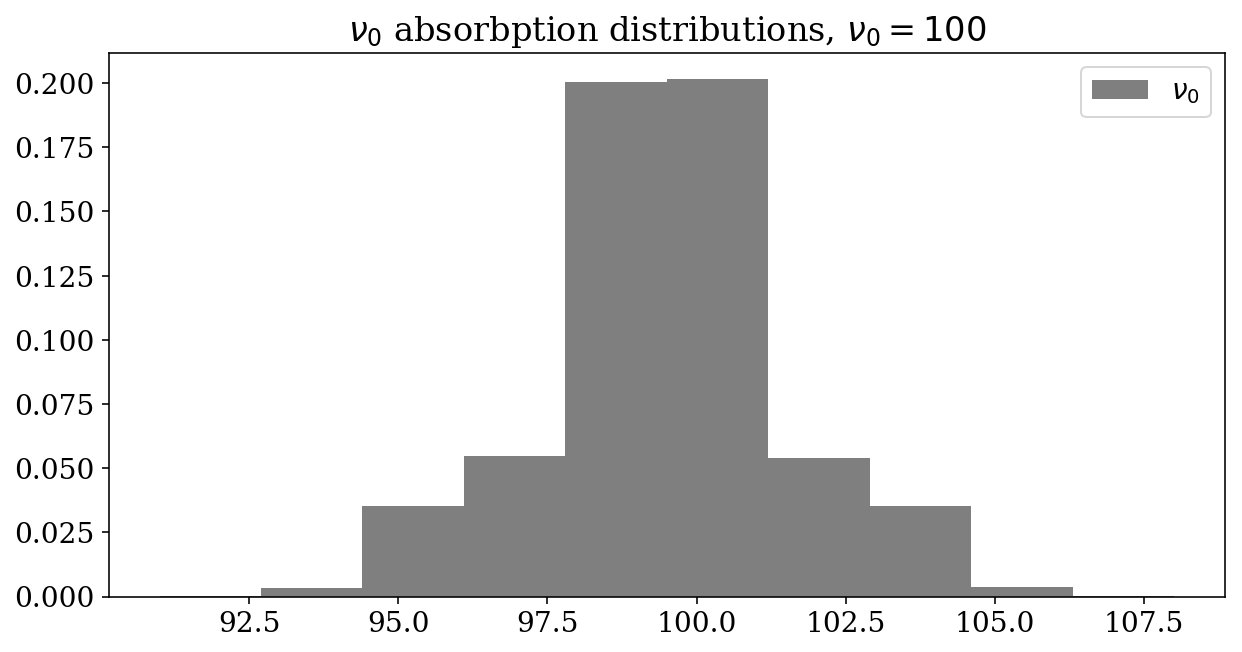

In [191]:
import random

# the case is when frequency ~ nu_0, 
# the shell will tend to absorb the photon. 
# To mimic this effect, let's say 
mu_nu_0  = 100
std_nu_0 = 2

# with normal distribution to absorb the photons
def normal_prior_sampler(mu=mu_nu_0, sigma=std_nu_0):
    '''Yield stream of samples from N(mu, sigma) in interval (80, 120).'''
    while True:
        x = random.normalvariate(mu, sigma)
        if 80 <= x <= 121:
            yield int(x) # to make the question simpler, I use integers
            
plt.hist(take(100000, normal_prior_sampler()), 
         label='$\\nu_0$', alpha=0.5, normed=True)
plt.title('$\\nu_0$ absorbption distributions, $\\nu_0 = 100$')
plt.legend();            

Let's start with CASE A first, 
- Ray A | frequency $\nu_0$
- Ray A | frequency $\nu_1$    

In case A, the Ray directly come from the center of the Tc object. We've known that Tc > Ts, so the brightness of Tc object is higher than Ts object. 

Now we need Tc object to emit some photons. Suppose we have no priors on the distribution of the frequencies of the photons from Tc object, we may suppose a uniform prior.  

In [192]:
# let's restrict the frequency is between 80 ~ 120
def uniform_prior_sampler():
    '''Yield random numbers in interval (80, 120).'''
    while True:
        yield random.randint(80, 119)
   
# this function show the absorption ~ nu_0
def absorpt_sampler(simulate_sampler, prior_sampler):
    for s,p in zip(simulate_sampler, prior_sampler):
        if s != p:
            yield s
        else: yield # yield None for absorption

# initilize the generator for absorption Ray A start from Tc object
# and hit on Ts object.
absorpt_A_sampler = absorpt_sampler(uniform_prior_sampler(), 
                                    normal_prior_sampler())

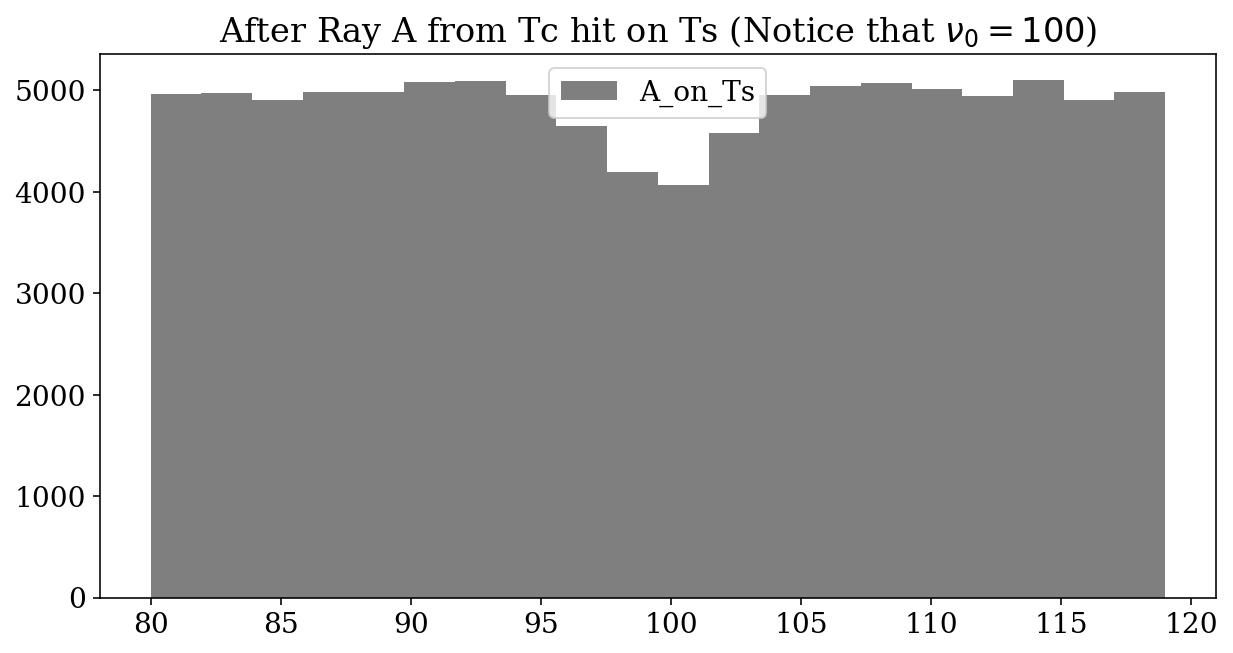

In [256]:
# plot the hist for visualize
A_on_Ts = take(100000, absorpt_A_sampler)
A_on_Ts = list(filter(lambda x: x is not None, A_on_Ts))

plt.hist(A_on_Ts, bins=20,
         label='A_on_Ts', alpha=0.5,)
plt.title('After Ray A from Tc hit on Ts (Notice that $\\nu_0 = 100$)')
plt.legend();            

So for frequency `!=` $\nu_0$, the intensity is higher.

For case Ray B, we have
- Ray B | frequency $\nu_0$    
- Ray B | frequency $\nu_1$    

We don't have any information about initial intensity of Ray B, so, again, the prior is uniform distribution among frequency (say a weak and nosiy incident with 1/100 intensity of Tc). 

Ray B hit on shell Ts, and the absorption happens with normal distribution with mean on $\nu_0$. 

The following scenario I am not sure what I am imagining is right:  
At the time Ray B hit on shell Ts, we should note that if the intensity of Ts is larger than Ray B incident, then the ray passing through would be enhanced instead of reduced.  

In [229]:
# this function show the enhance ~ nu_0
def enhance_sampler(simulate_sampler, prior_sampler):
    for s,p in zip(simulate_sampler, prior_sampler):
        if s != p:
            yield s
        else: 
            yield s,p # yield s, p for enhance
                
enhance_B_sampler = enhance_sampler(uniform_prior_sampler(), 
                                    normal_prior_sampler())                


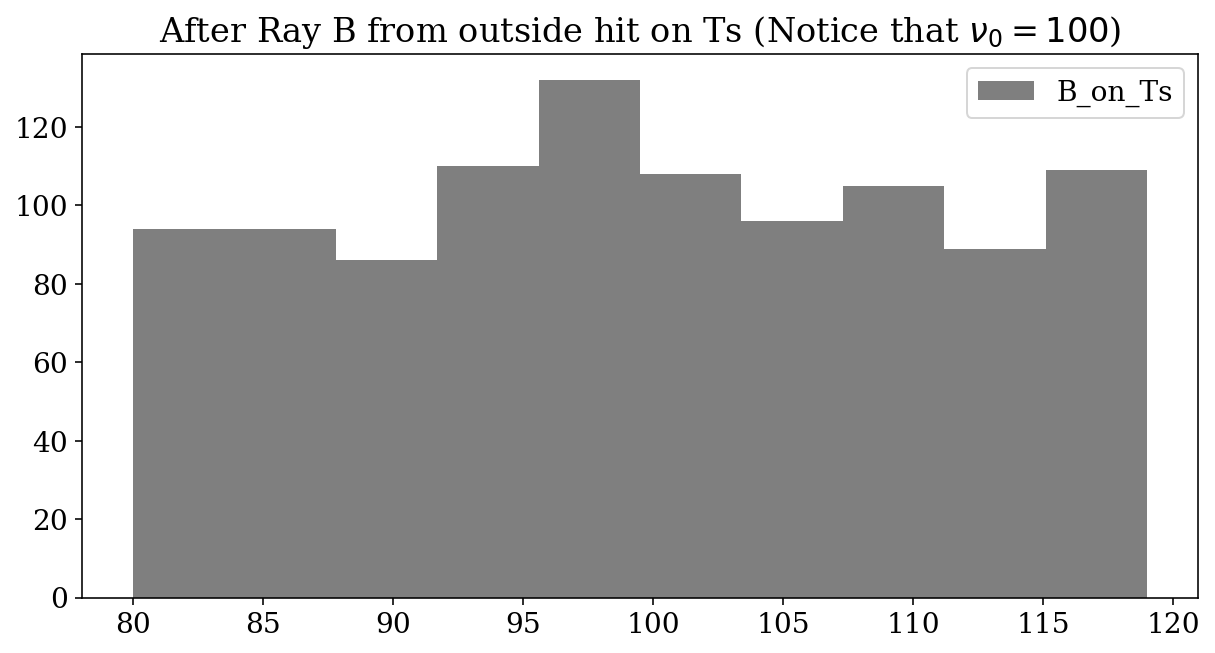

In [278]:
# plot the hist for visualize
B_on_Ts = take(1000, enhance_B_sampler)
B_on_Ts = list(filter(lambda x: type(x) is int, B_on_Ts)) + \
    2 * list(
    map(lambda x: x[0],
    filter(lambda x: type(x) is not int, B_on_Ts))
    )
    
plt.hist(B_on_Ts, bins=10,
         label='B_on_Ts', alpha=0.5,)
plt.title('After Ray B from outside hit on Ts (Notice that $\\nu_0 = 100$)')
plt.legend();            

You can see around $\nu_0$, there is a bump enhanced by the Ts object.  
But, actually, the result is not so concrete since 1000 samples are too uncertain to generate this bump every time. We can try to average lots of generations.  Let's say 100 generations. 

(I am a little bit lazy to average the results, so I just plotted them together in one figure. You can take the shaded area as the uncertainty area.)

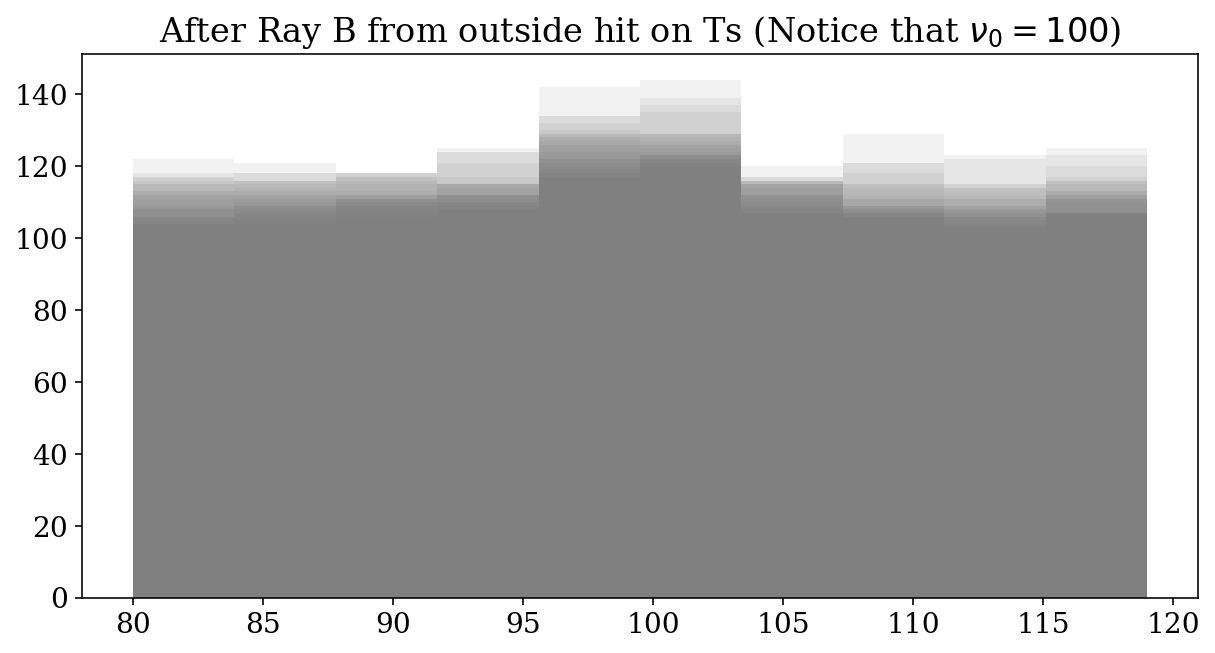

In [286]:
# plot the hist for visualize
for i in range(100):
    B_on_Ts = take(1000, enhance_B_sampler)
    B_on_Ts = list(filter(lambda x: type(x) is int, B_on_Ts)) + \
        2 * list(
        map(lambda x: x[0],
        filter(lambda x: type(x) is not int, B_on_Ts))
        )
    
    plt.hist(B_on_Ts, bins=10,
             alpha=0.1, color='grey')
plt.title('After Ray B from outside hit on Ts (Notice that $\\nu_0 = 100$)')

So, around $\nu_0$ there is a bump, but the overall intensity is not that high as Ray A.

b. 

in this question, we need to assume Ts > Tc.  

So basically, what we have to modified is to reverse the absorption in Ray A to enhance, and enlarge the enhance in Ray B. 

(0, 160)

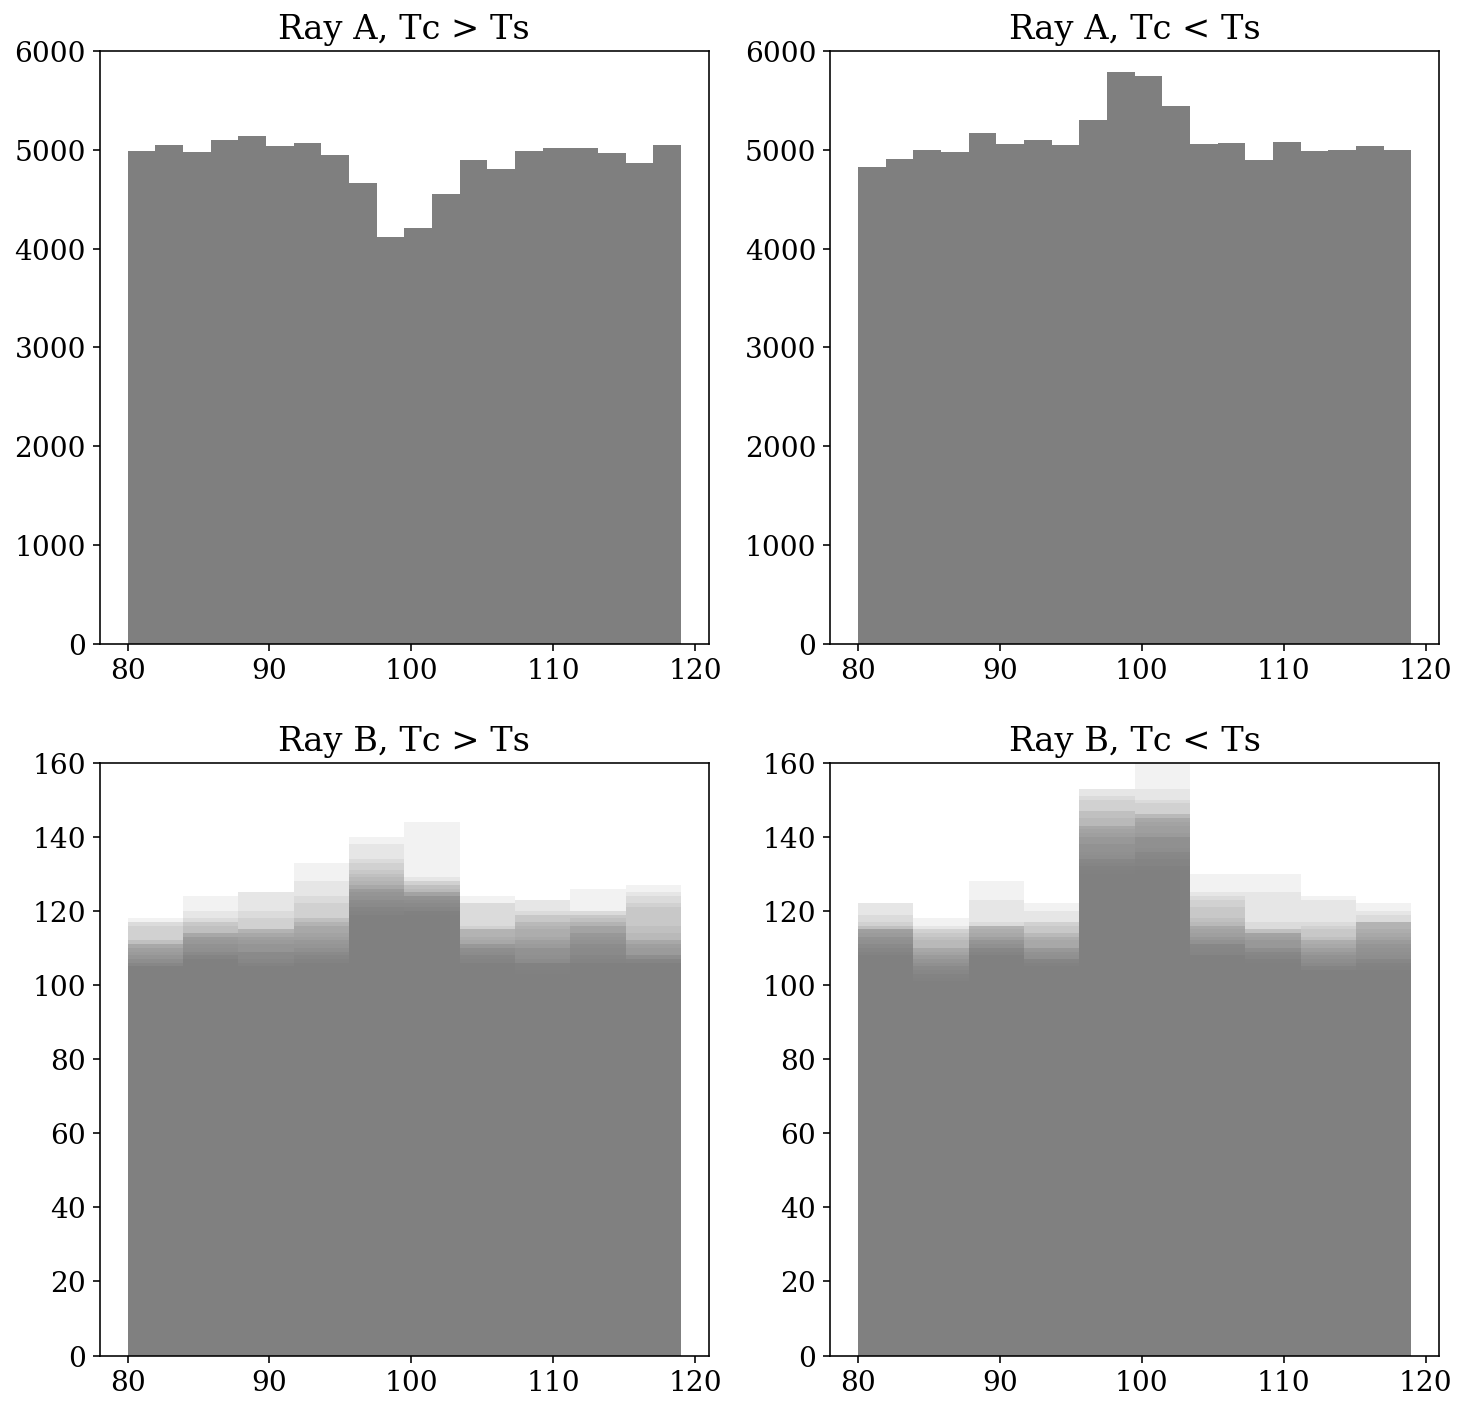

In [301]:
## plot all of the reuslts in one figure
fig, ax = plt.subplots(2,2, figsize=(12,12))

# Ray A, Tc > Ts
A_on_Ts_a = take(100000, absorpt_A_sampler)
A_on_Ts_a = list(filter(lambda x: x is not None, A_on_Ts_a))

ax[0,0].hist(A_on_Ts_a, bins=20,
             alpha=0.5,)
ax[0,0].set_title('Ray A, Tc > Ts')
ax[0,0].set_ylim(0,6000)    

# Ray A, Ts < Tc
A_on_Ts_b = take(100000, enhance_B_sampler)
A_on_Ts_b = list(filter(lambda x: type(x) is int, A_on_Ts_b)) + \
    2 * list(
    map(lambda x: x[0],
    filter(lambda x: type(x) is not int, A_on_Ts_b))
    )

ax[0,1].hist(A_on_Ts_b, bins=20,
             alpha=0.5,)
ax[0,1].set_title('Ray A, Tc < Ts')
ax[0,1].set_ylim(0,6000)    
    
# Ray B, Tc > Ts
for i in range(100):
    B_on_Ts_a = take(1000, enhance_B_sampler)
    B_on_Ts_a = list(filter(lambda x: type(x) is int, B_on_Ts_a)) + \
        2 * list(
        map(lambda x: x[0],
        filter(lambda x: type(x) is not int, B_on_Ts_a))
        )
    
    ax[1,0].hist(B_on_Ts_a, bins=10,
             alpha=0.1, color='grey')
ax[1,0].set_title('Ray B, Tc > Ts')    
ax[1,0].set_ylim(0,160)

# Ray B, Tc < Ts
for i in range(100):
    B_on_Ts_a = take(1000, enhance_B_sampler)
    B_on_Ts_a = list(filter(lambda x: type(x) is int, B_on_Ts_a)) + \
        3 * list(
        map(lambda x: x[0],
        filter(lambda x: type(x) is not int, B_on_Ts_a))
        ) 
        # Hmmm..., I use 3 instead of 2 to emphasize 
        # the enhance is stronger, but this trick is 
        # actually a little bit ad hoc. But anyway, 
        # I can give a qualitative result here.
    
    ax[1,1].hist(B_on_Ts_a, bins=10,
             alpha=0.1, color='grey')
ax[1,1].set_title('Ray B, Tc < Ts')    
ax[1,1].set_ylim(0,160)

This subplots demonstrates that:

1. Ray A | Tc > Ts: $I(\nu_0)$ is smaller than $I(\nu_1)$
2. Ray A | Tc < Ts: $I(\nu_0)$ is larger  than $I(\nu_1)$
3. Ray B | Tc > Ts: $I(\nu_0)$ is larger  than $I(\nu_1)$
4. Ray B | Tc < Ts: $I(\nu_0)$ is larger  than $I(\nu_1)$, and larger than CASE 3.

I stole the solution page for comparison here: 

![](1.9.png)

Reference:  
- RADIATIVE PROCESSES IN ASTROPHYSICS, GEORGE B. RYBICKI, ALAN P. LIGHTMAN Copyright 0 2004 W Y - V C H Verlag GmbH L Co. KCaA
- The programming style I used in this notebook is inspired from this website: [probabilistic-programming-from-scratch](https://www.oreilly.com/learning/probabilistic-programming-from-scratch).